### Standard Dataframe

This notebook runs the standard dataframe pipeline to produce a single dataframe from the neighborhood level data, which is then put into the "data" directory of the repository. The code also produces maps of each city at the census level and at the neighborhood level. These plots are saved into the "visualizations" directory in the repository.

While the code runs, it checks to see whether we are losing neighborhoods in the merging process. It also checks the population of the census tracts pre-merge and then the final population of the merge. The differences here occur because we double count some census tracts that overlap with multiple neighborhoods. This could be skewing potential results, so we want to process the data further to ensure our results are not largely skewed.

This code produces both "clean" plots and plots with data that has not been cleaned. "Cleaned" data refers to data that has been processes to attempt to remove some census tracts that overlap multiple neighborhoods to avoid duplicating results. At the moment, the code checks whether at least 40% of a census tract is contained in a neighborhood. If so, the census tract is mapped to that neighborhood during the data merge.

In the future, a comparison should be made between the "cleaned" data and the pre-processed data to determine whether the extensive processing of the data is necessary.

The complete code that we call here can be found in the "lib" directory of the repository and the "data_pipeline" directory of the repository.

In [1]:
# import statements
import geopandas
import contextily as cx
import warnings
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')

In [3]:
import data_pipeline.spatial_operations as so

In [4]:
import lib.standard_neighborhood_dataframe as sd_n
import lib.standard_censustract_dataframe as sd_ct

Running phoenix, 0 of 19
Neighborhoods before merge: 15
Neighborhoods after merge: 15
Population before merge: 1885933.0
Population after merge, with duplicates: 2579452.0
Population after merge, cleaned: 2527287.0


Running dallas, 1 of 19
Neighborhoods before merge: 14
Neighborhoods after merge: 14
Population before merge: 1840889.0
Population after merge, with duplicates: 2832169.0
Population after merge, cleaned: 2832222.0


Running detroit, 2 of 19
Neighborhoods before merge: 207
Neighborhoods after merge: 207
Population before merge: 844343.0
Population after merge, with duplicates: 2862987.0
Population after merge, cleaned: 2806294.0


Running los-angeles, 3 of 19
Neighborhoods before merge: 272
Neighborhoods after merge: 272
Population before merge: 10352220.0
Population after merge, with duplicates: 21679448.0
Population after merge, cleaned: 22125675.0


Running new-york-city, 4 of 19
Neighborhoods before merge: 71
Neighborhoods after merge: 71
Population before merge: 856541

NameError: name 'standard_city_dataframes_cleaned' is not defined

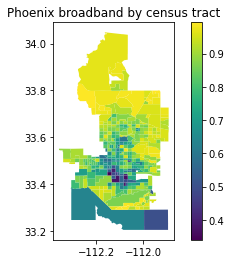

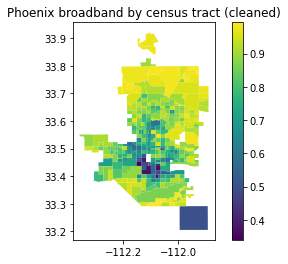

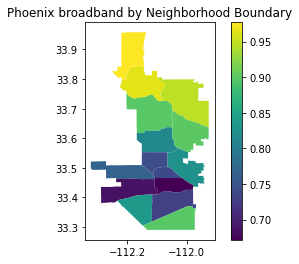

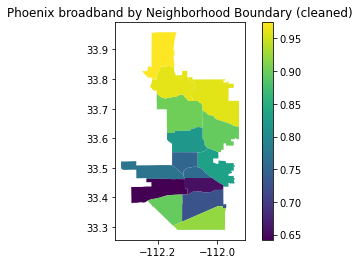

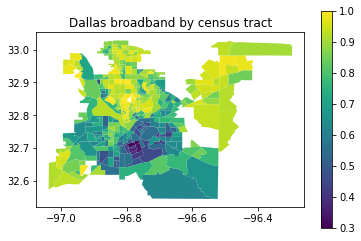

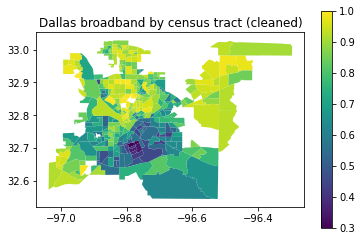

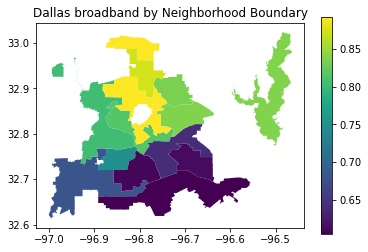

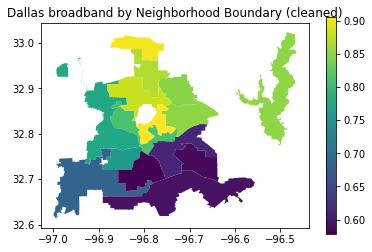

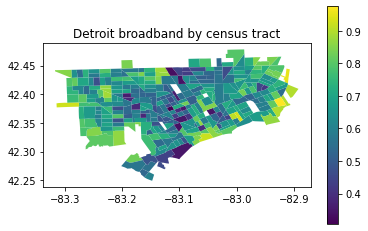

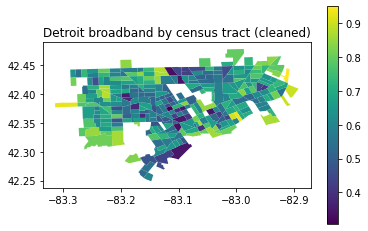

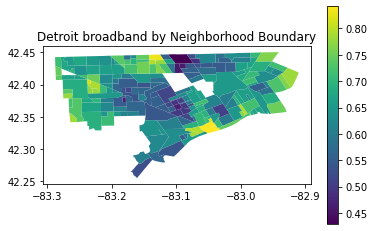

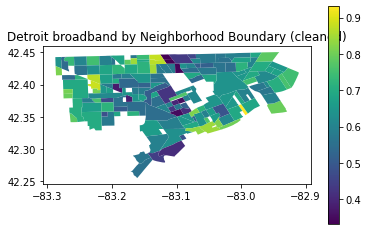

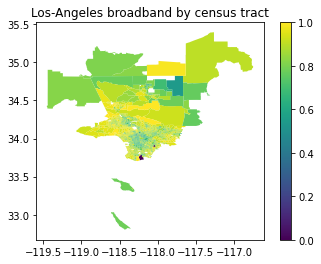

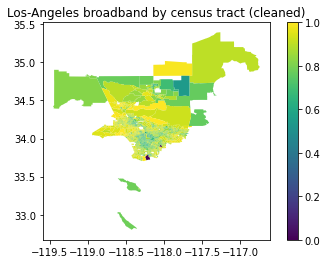

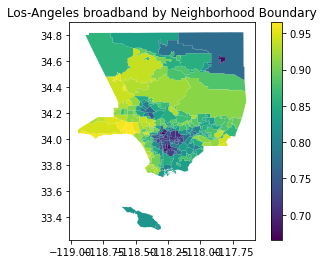

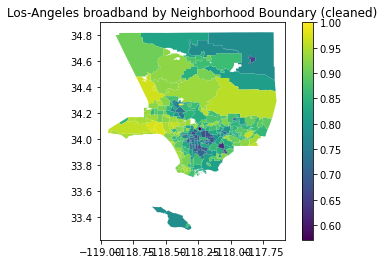

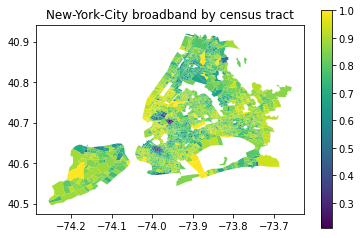

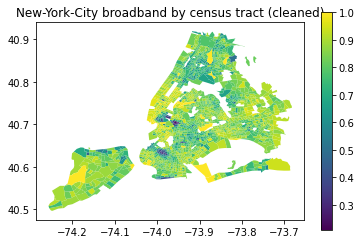

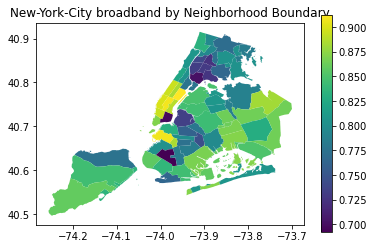

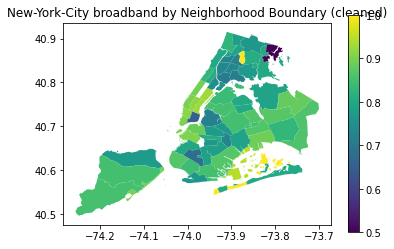

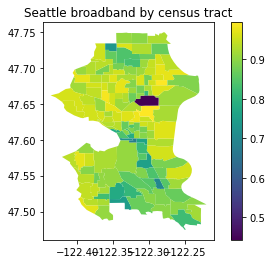

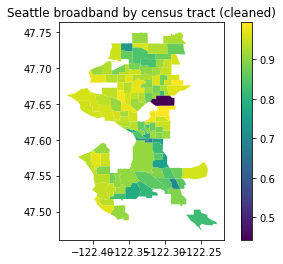

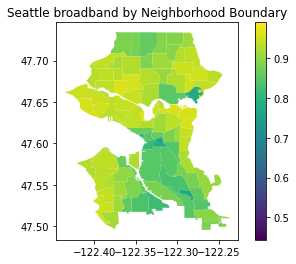

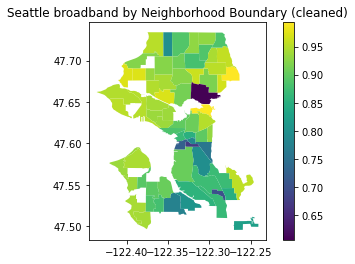

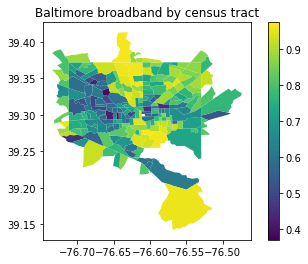

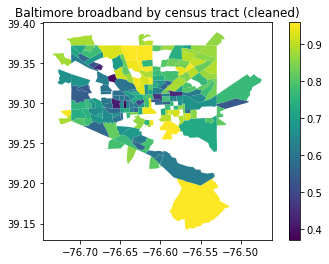

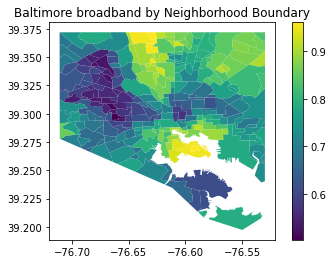

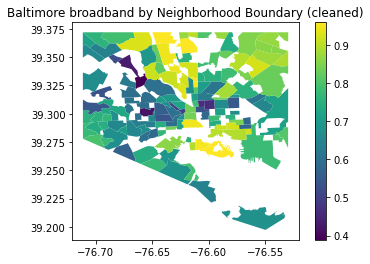

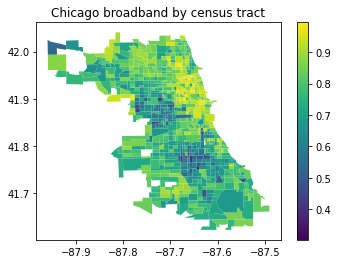

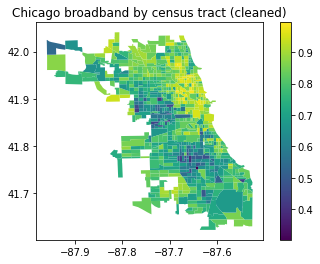

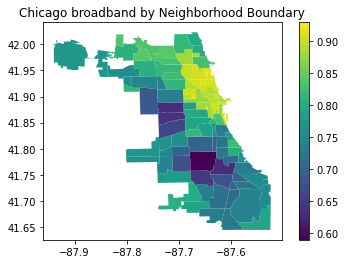

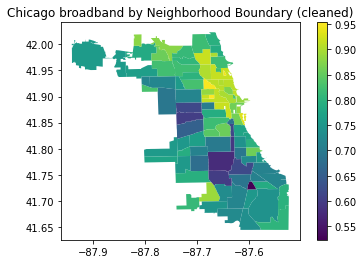

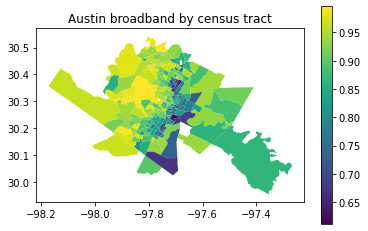

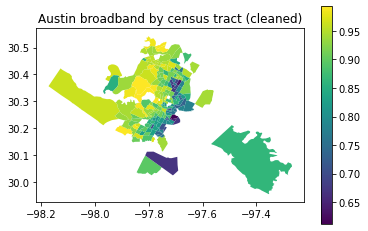

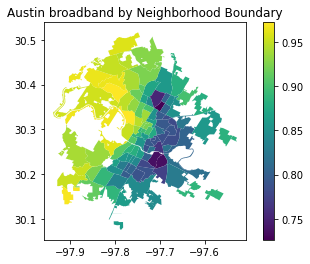

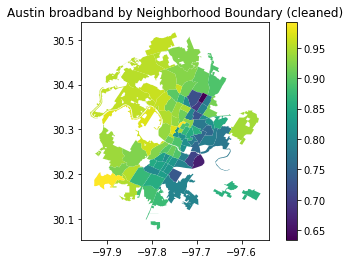

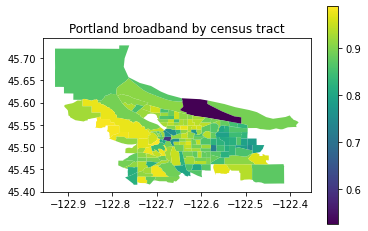

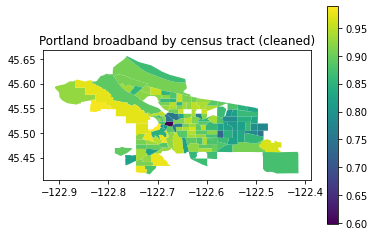

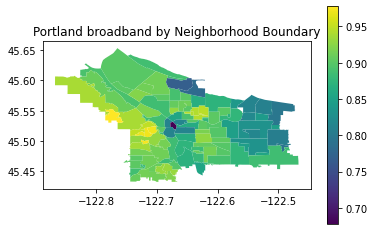

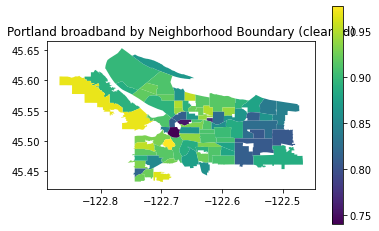

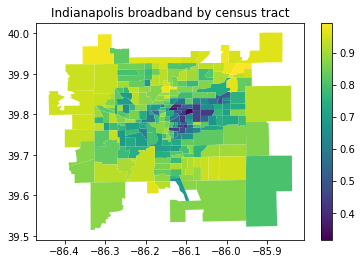

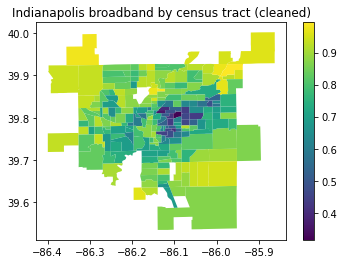

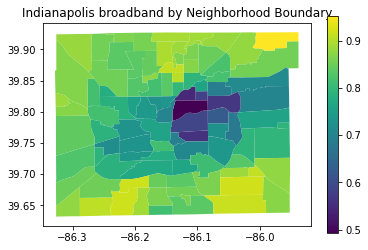

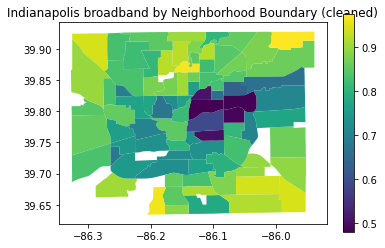

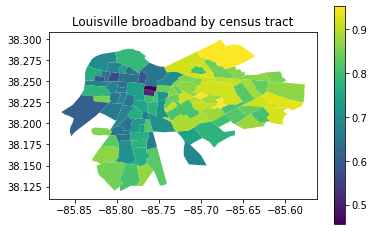

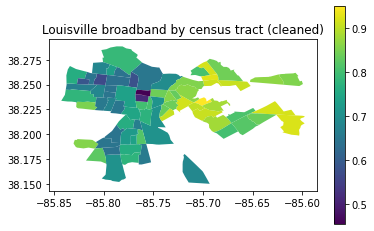

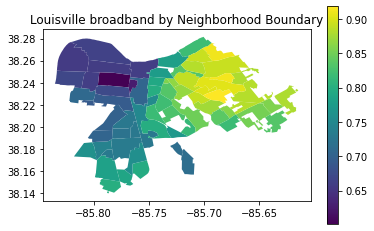

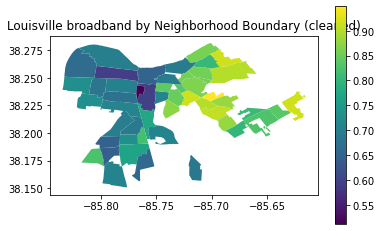

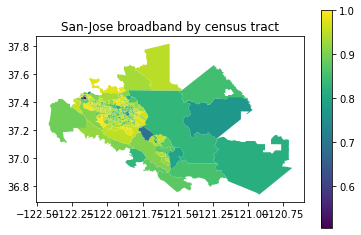

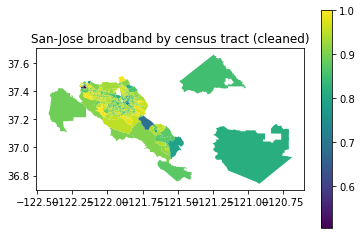

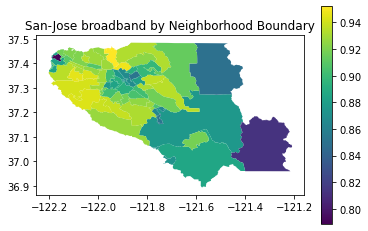

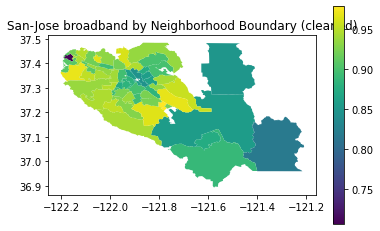

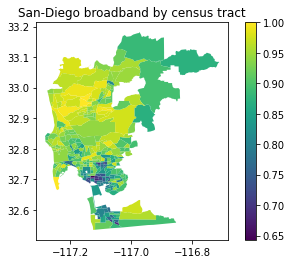

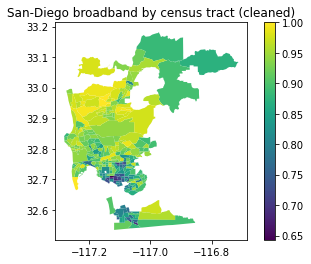

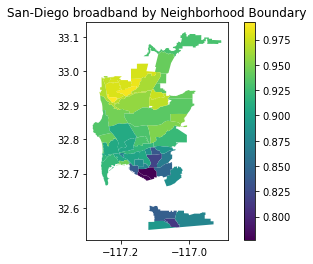

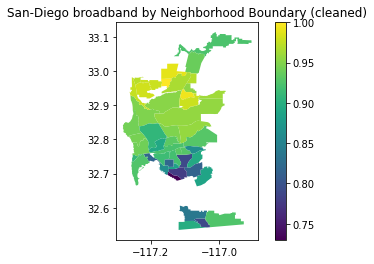

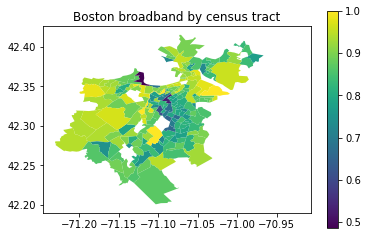

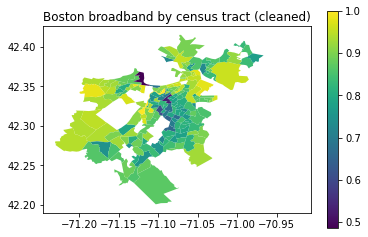

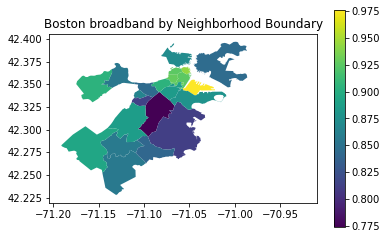

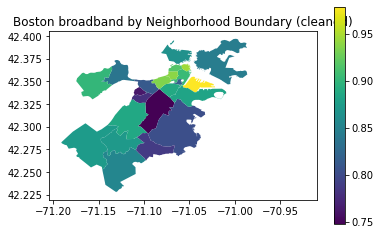

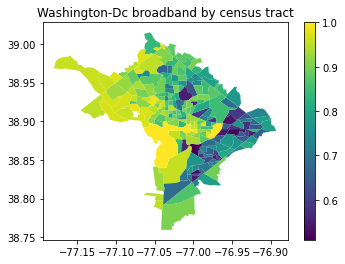

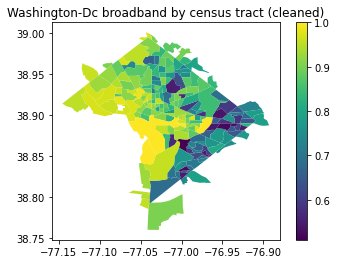

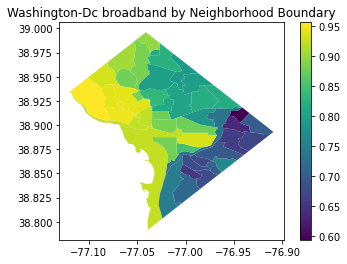

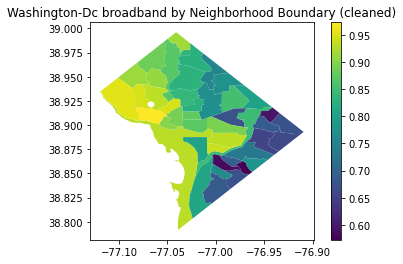

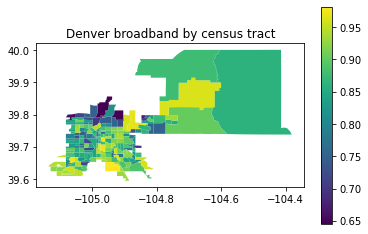

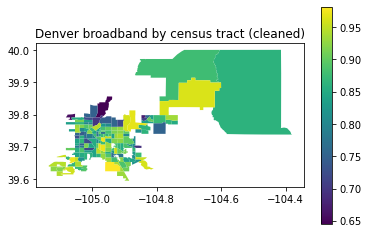

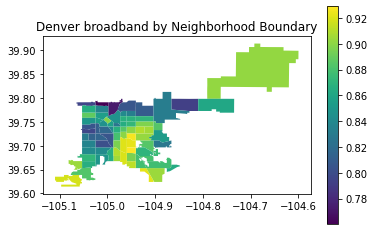

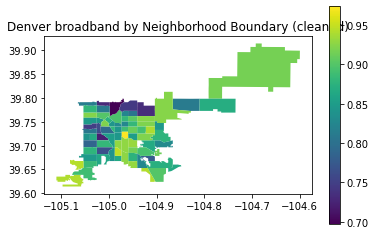

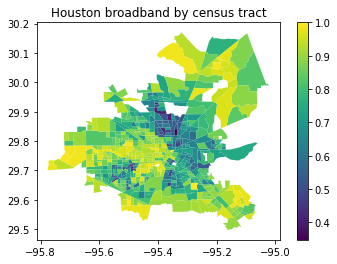

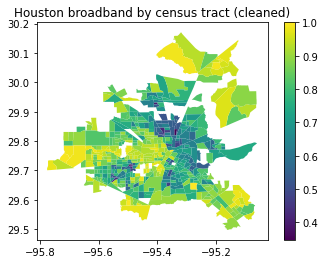

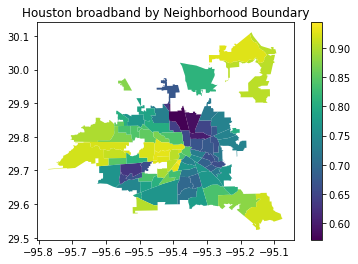

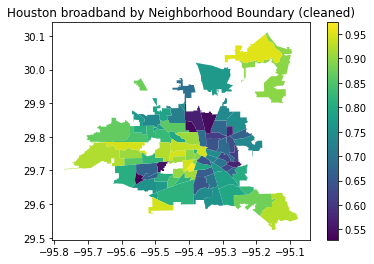

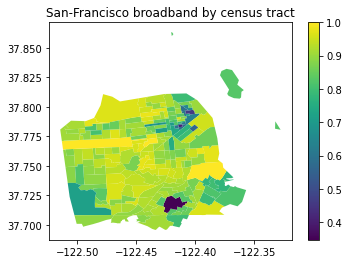

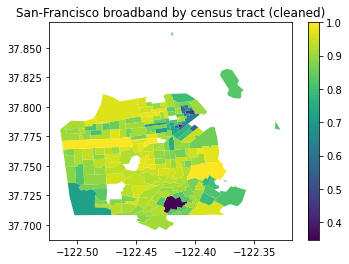

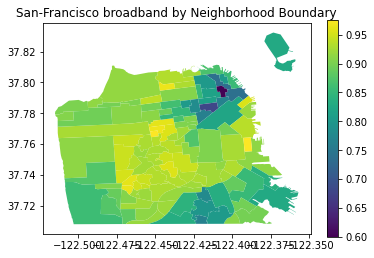

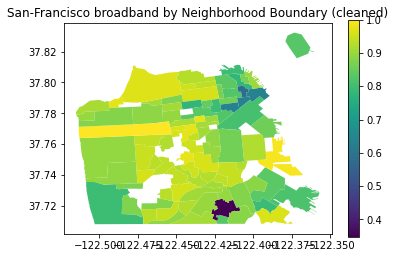

In [5]:
# run the code
sd_n.generate_dataframe_and_plots()

Running chicago, 0 of 1
Population before merge: 3057323.0
Population after merge: 3057323.0




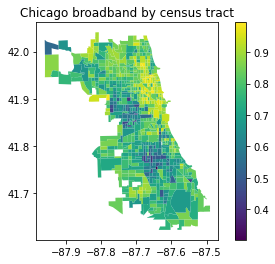

In [9]:
sd_ct.generate_dataframe_and_plots()

In [16]:
chicago_df = geopandas.read_file("/tmp/city-data/chicago/city-merged.geojson")
chicago_df

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,u_mbps,lat_ms,tests_per_cap,devices_per_cap,index_right,name,objectid,shape_area,shape_len,geometry
0,17031440300,4.731,4.435,2.796,2.157,0.259,0.259,1000.000,295.741,0.686,...,23.63,14.11,0.022,0.004,0,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((-87.62455 41.75096, -87.62139 41.751..."
1,17031480300,3.733,3.533,2.356,1.778,0.000,0.000,978.889,46.444,0.706,...,13.54,12.40,0.008,0.004,0,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((-87.59280 41.73316, -87.58927 41.733..."
2,17031060900,5.381,5.048,3.000,2.524,0.190,0.143,861.762,191.738,0.911,...,42.55,11.11,0.070,0.026,0,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((-87.64962 41.95120, -87.64785 41.951..."
3,17031063302,5.583,4.833,3.500,3.500,0.667,0.667,1000.000,678.333,0.872,...,56.47,11.00,0.075,0.018,0,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((-87.64186 41.93655, -87.63943 41.936..."
4,17031650100,4.632,4.294,2.941,2.368,0.500,0.500,1000.000,523.456,0.740,...,35.91,14.00,0.071,0.010,0,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((-87.72296 41.78594, -87.71806 41.786..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,17031711200,4.445,4.299,2.555,1.949,0.022,0.022,1000.000,69.708,0.547,...,18.22,14.13,0.010,0.004,0,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((-87.67804 41.74473, -87.67058 41.744..."
868,17031561000,3.650,2.886,2.057,1.902,0.919,0.919,1000.000,921.545,0.765,...,77.40,10.10,0.046,0.012,0,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((-87.80153 41.79194, -87.79772 41.792..."
869,17031823500,3.740,3.519,1.366,1.000,0.000,0.000,1000.000,35.000,0.717,...,36.18,14.94,0.016,0.007,0,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((-87.68741 41.65987, -87.68752 41.662..."
870,17031560800,2.942,2.734,1.971,1.849,0.856,0.856,1000.000,861.151,0.705,...,94.00,9.79,0.032,0.012,0,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((-87.78203 41.79967, -87.77838 41.799..."


Running chicago, 0 of 7
Population before merge: 3057323.0
Population after merge: 3057323.0


Running louisville, 1 of 7
Population before merge: 1155199.0
Population after merge: 2333016.0


Running phoenix, 2 of 7
Population before merge: 1873757.0
Population after merge: 1873757.0


Running portland, 3 of 7
Population before merge: 2296287.0
Population after merge: 3170298.0


Running san jose, 4 of 7


DriverError: Failed to create GeoJSON datasource: /tmp/city-data/san jose/city-merged.geojson: /tmp/city-data/san jose/city-merged.geojson: No such file or directory

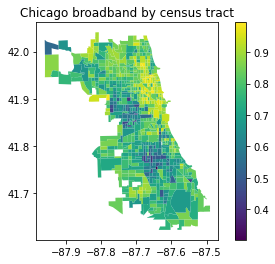

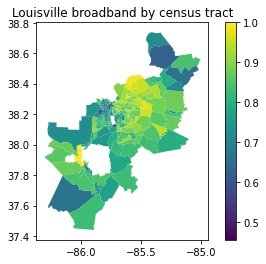

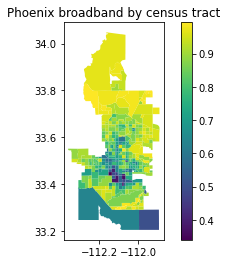

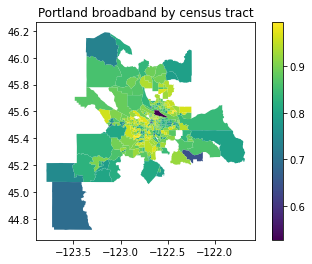

In [5]:
sd_ct.generate_dataframe_and_plots()